# CM

## FF

**1.uram-before**

prd:
/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy

true:
/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy


**2.uram_after-abl**

prd:
/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy

true:
/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy

**3.uram-after**

prd:
/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy

true:
/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy

/tmp/ipykernel_170302/3876280634.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_170302/3876280634.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_170302/3876280634.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


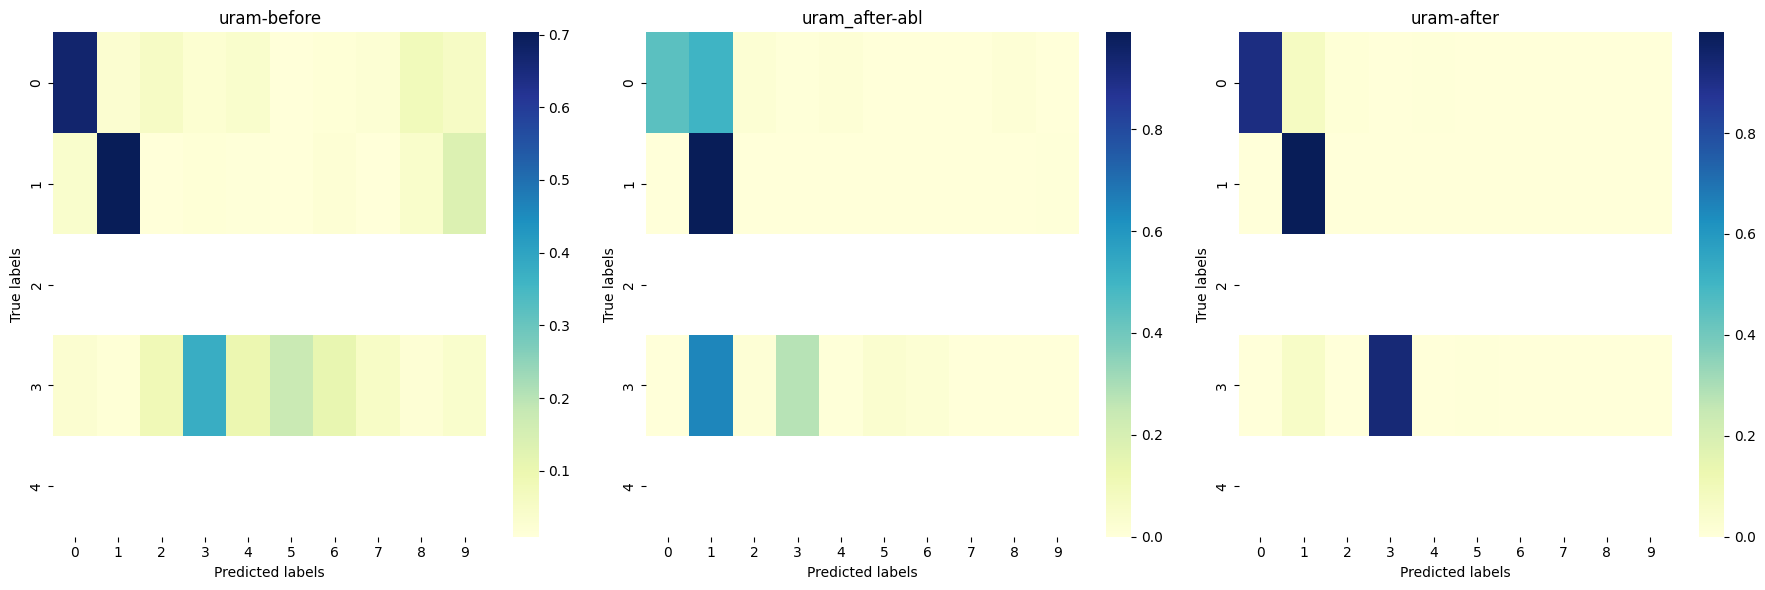

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to load data, compute confusion matrix, and return normalized confusion matrix
def load_and_compute_cm(predicted_path, true_path):
    predicted_labels = np.load(predicted_path)
    true_labels = np.load(true_path)
    cm = confusion_matrix(true_labels, predicted_labels) # 归一化方法
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    # just get the first 5 lines of the confusion matrix
    cm_normalized = cm_normalized[:5,]
    return cm_normalized

# File paths for the three cases
paths = {
    "uram-before": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram_after-abl": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram-after": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    }
}

# Compute confusion matrices for each case
cm_before = load_and_compute_cm(paths["uram-before"]["prd"], paths["uram-before"]["true"])
cm_after_abl = load_and_compute_cm(paths["uram_after-abl"]["prd"], paths["uram_after-abl"]["true"])
cm_after = load_and_compute_cm(paths["uram-after"]["prd"], paths["uram-after"]["true"])

# Plotting the confusion matrices side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(cm_before, annot=False, cmap='YlGnBu', cbar=True, ax=axes[0])
axes[0].set_title('uram-before')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

sns.heatmap(cm_after_abl, annot=False, cmap='YlGnBu', cbar=True, ax=axes[1])
axes[1].set_title('uram_after-abl')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

sns.heatmap(cm_after, annot=False, cmap='YlGnBu', cbar=True, ax=axes[2])
axes[2].set_title('uram-after')
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('True labels')

plt.tight_layout()
plt.show()


/tmp/ipykernel_170302/3665003516.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_170302/3665003516.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_170302/3665003516.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


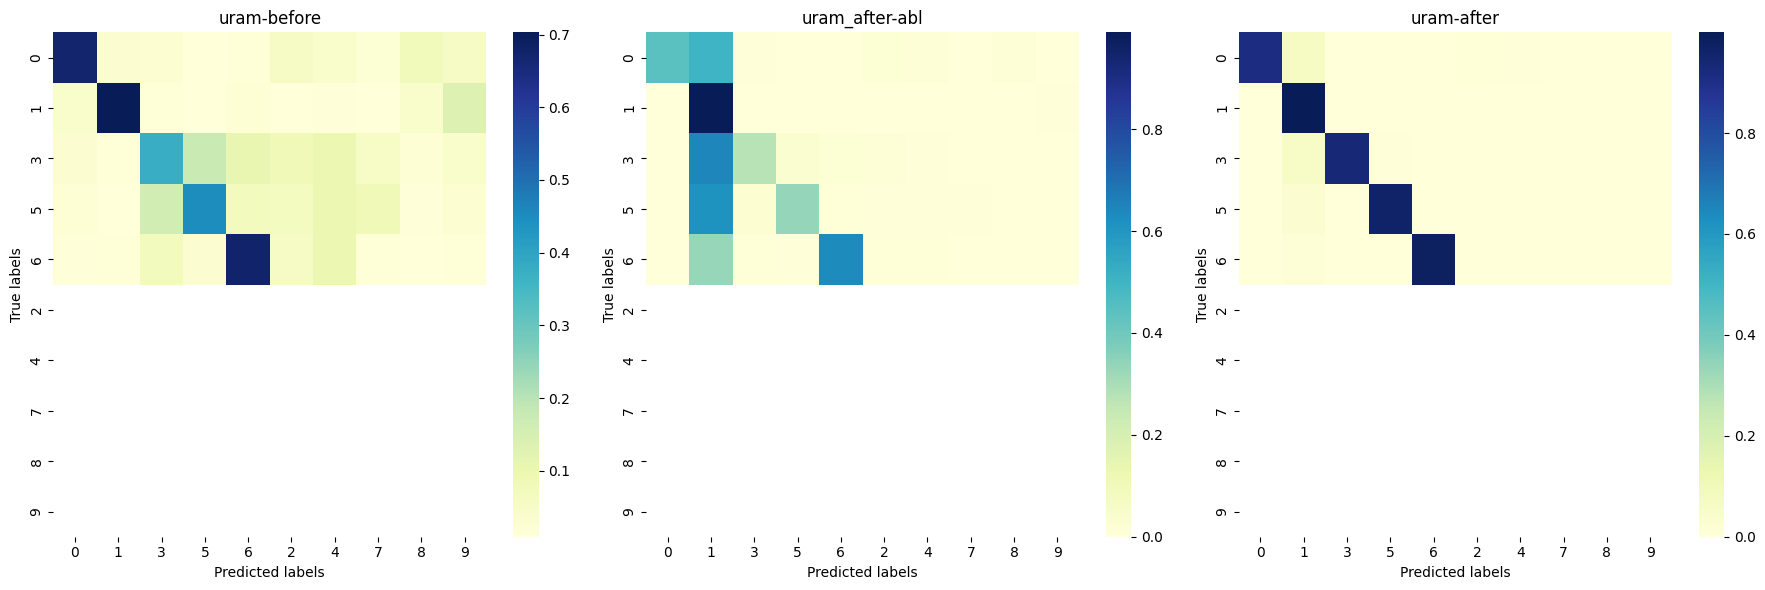

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to load data, compute confusion matrix, and return normalized confusion matrix with reordering
def load_and_compute_cm_with_reordering(predicted_path, true_path, order):
    predicted_labels = np.load(predicted_path)
    true_labels = np.load(true_path)
    cm = confusion_matrix(true_labels, predicted_labels, labels=order)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return cm_normalized

# Define the new order for labels
new_order = [0, 1, 3, 5, 6, 2, 4, 7, 8, 9]

# File paths for the three cases
paths = {
    "uram-before": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram_after-abl": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram-after": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    }
}

# Compute confusion matrices for each case with reordering
cm_before = load_and_compute_cm_with_reordering(paths["uram-before"]["prd"], paths["uram-before"]["true"], new_order)
cm_after_abl = load_and_compute_cm_with_reordering(paths["uram_after-abl"]["prd"], paths["uram_after-abl"]["true"], new_order)
cm_after = load_and_compute_cm_with_reordering(paths["uram-after"]["prd"], paths["uram-after"]["true"], new_order)

# Plotting the confusion matrices side by side with reordered axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(cm_before, annot=False, cmap='YlGnBu', cbar=True, ax=axes[0], xticklabels=new_order, yticklabels=new_order)
axes[0].set_title('uram-before')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

sns.heatmap(cm_after_abl, annot=False, cmap='YlGnBu', cbar=True, ax=axes[1], xticklabels=new_order, yticklabels=new_order)
axes[1].set_title('uram_after-abl')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

sns.heatmap(cm_after, annot=False, cmap='YlGnBu', cbar=True, ax=axes[2], xticklabels=new_order, yticklabels=new_order)
axes[2].set_title('uram-after')
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('True labels')

plt.tight_layout()
plt.show()


/tmp/ipykernel_170302/3786560146.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_170302/3786560146.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_170302/3786560146.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


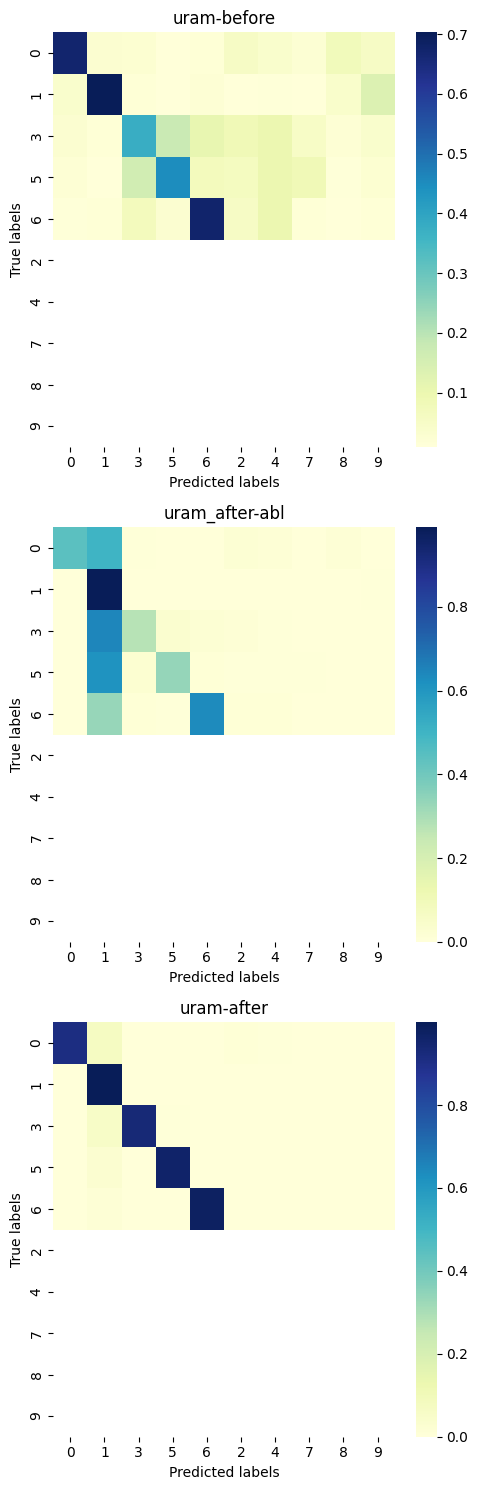

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to load data, compute confusion matrix, and return normalized confusion matrix with reordering
def load_and_compute_cm_with_reordering(predicted_path, true_path, order):
    predicted_labels = np.load(predicted_path)
    true_labels = np.load(true_path)
    cm = confusion_matrix(true_labels, predicted_labels, labels=order)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return cm_normalized

# Define the new order for labels
new_order = [0, 1, 3, 5, 6, 2, 4, 7, 8, 9]

# File paths for the three cases
paths = {
    "uram-before": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram_after-abl": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram-after": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    }
}

# Compute confusion matrices for each case with reordering
cm_before = load_and_compute_cm_with_reordering(paths["uram-before"]["prd"], paths["uram-before"]["true"], new_order)
cm_after_abl = load_and_compute_cm_with_reordering(paths["uram_after-abl"]["prd"], paths["uram_after-abl"]["true"], new_order)
cm_after = load_and_compute_cm_with_reordering(paths["uram-after"]["prd"], paths["uram-after"]["true"], new_order)

# Plotting the confusion matrices vertically with reordered axes
fig, axes = plt.subplots(3, 1, figsize=(5, 15))

sns.heatmap(cm_before, annot=False, cmap='YlGnBu', cbar=True, ax=axes[0], xticklabels=new_order, yticklabels=new_order)
axes[0].set_title('uram-before')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

sns.heatmap(cm_after_abl, annot=False, cmap='YlGnBu', cbar=True, ax=axes[1], xticklabels=new_order, yticklabels=new_order)
axes[1].set_title('uram_after-abl')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

sns.heatmap(cm_after, annot=False, cmap='YlGnBu', cbar=True, ax=axes[2], xticklabels=new_order, yticklabels=new_order)
axes[2].set_title('uram-after')
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('True labels')

plt.tight_layout()
plt.show()


/tmp/ipykernel_170302/2898411394.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_170302/2898411394.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_170302/2898411394.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


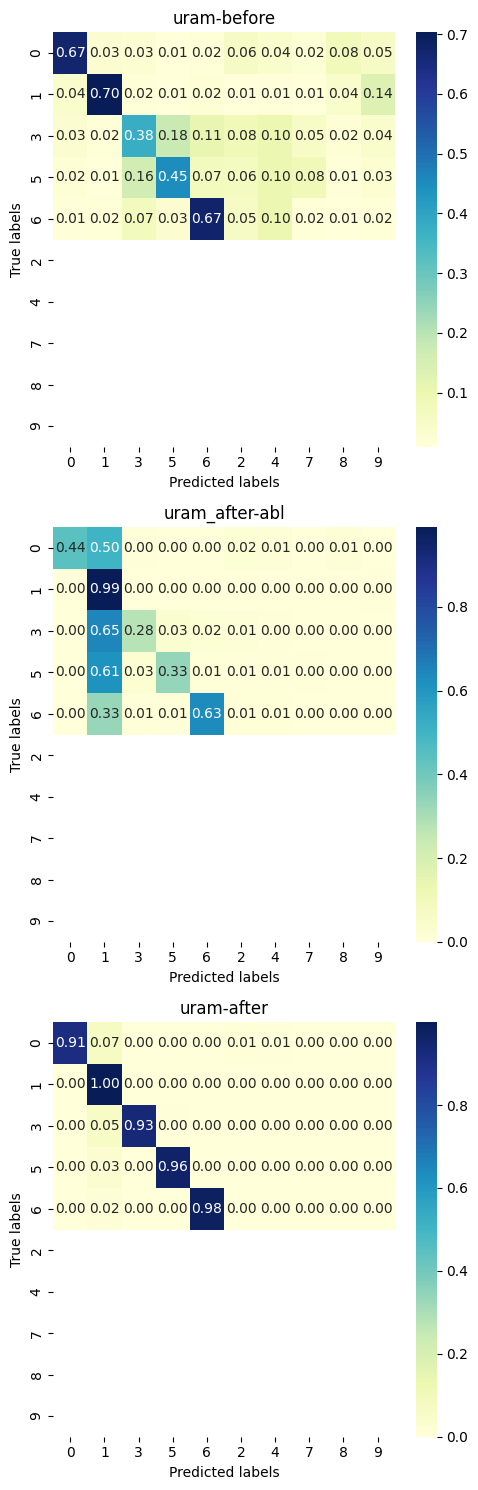

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to load data, compute confusion matrix, and return normalized confusion matrix with reordering
def load_and_compute_cm_with_reordering(predicted_path, true_path, order):
    predicted_labels = np.load(predicted_path)
    true_labels = np.load(true_path)
    cm = confusion_matrix(true_labels, predicted_labels, labels=order)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return cm_normalized

# Define the new order for labels
new_order = [0, 1, 3, 5, 6, 2, 4, 7, 8, 9]

# File paths for the three cases
paths = {
    "uram-before": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram_after-abl": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram-after": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    }
}

# Compute confusion matrices for each case with reordering
cm_before = load_and_compute_cm_with_reordering(paths["uram-before"]["prd"], paths["uram-before"]["true"], new_order)
cm_after_abl = load_and_compute_cm_with_reordering(paths["uram_after-abl"]["prd"], paths["uram_after-abl"]["true"], new_order)
cm_after = load_and_compute_cm_with_reordering(paths["uram-after"]["prd"], paths["uram-after"]["true"], new_order)

# Plotting the confusion matrices vertically with reordered axes and cell values annotated
fig, axes = plt.subplots(3, 1, figsize=(5, 15))

sns.heatmap(cm_before, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, ax=axes[0], xticklabels=new_order, yticklabels=new_order)
axes[0].set_title('uram-before')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

sns.heatmap(cm_after_abl, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, ax=axes[1], xticklabels=new_order, yticklabels=new_order)
axes[1].set_title('uram_after-abl')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

sns.heatmap(cm_after, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, ax=axes[2], xticklabels=new_order, yticklabels=new_order)
axes[2].set_title('uram-after')
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('True labels')

plt.tight_layout()
plt.show()


In [76]:

# File paths for the three cases
paths = {
    "uram-before": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram_after-abl": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram-after": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    }
}


/tmp/ipykernel_170302/278484306.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_170302/278484306.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_170302/278484306.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


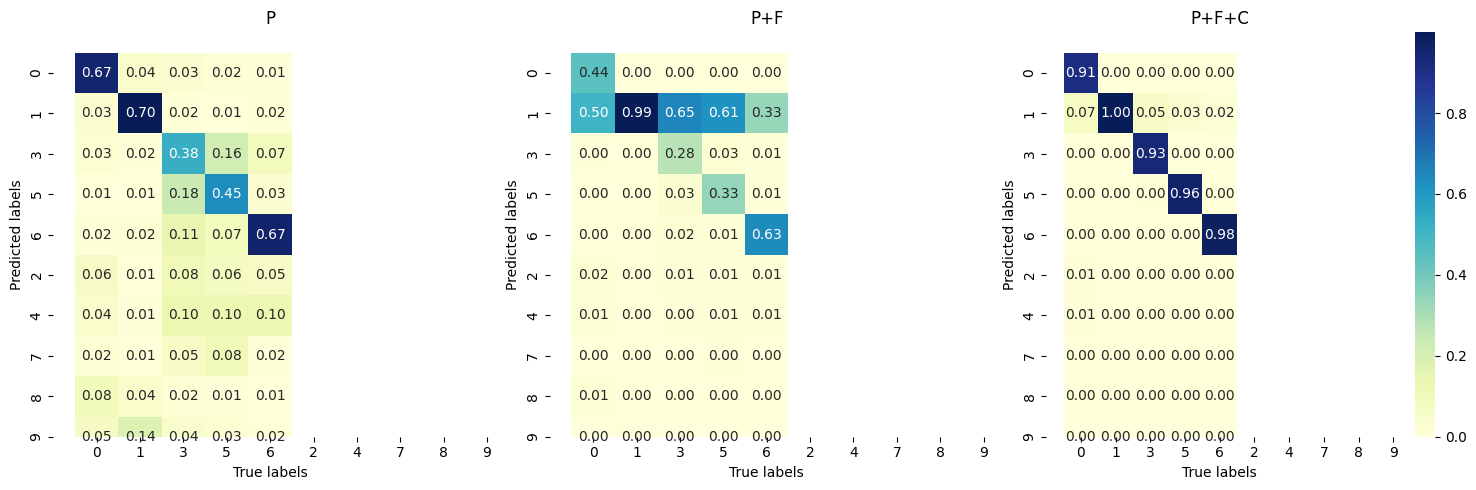

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to load data, compute confusion matrix, and return normalized confusion matrix with reordering
def load_and_compute_cm_with_reordering(predicted_path, true_path, order):
    predicted_labels = np.load(predicted_path)
    true_labels = np.load(true_path)
    cm = confusion_matrix(true_labels, predicted_labels, labels=order)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return cm_normalized

# Define the new order for labels
new_order = [0, 1, 3, 5, 6, 2, 4, 7, 8, 9]

# File paths for the three cases
paths = {
    "uram-before": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram_after-abl": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram-after": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    }
}

# Compute confusion matrices for each case with reordering
cm_before = load_and_compute_cm_with_reordering(paths["uram-before"]["prd"], paths["uram-before"]["true"], new_order)
cm_after_abl = load_and_compute_cm_with_reordering(paths["uram_after-abl"]["prd"], paths["uram_after-abl"]["true"], new_order)
cm_after = load_and_compute_cm_with_reordering(paths["uram-after"]["prd"], paths["uram-after"]["true"], new_order)

# Plotting the confusion matrices horizontally with reordered axes and a single colorbar
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# First plot without a colorbar
sns.heatmap(cm_before.T, annot=True, fmt='.2f', cmap='YlGnBu', cbar=False, ax=axes[0], xticklabels=new_order, yticklabels=new_order)
axes[0].set_title('P')
axes[0].set_xlabel('True labels')
axes[0].set_ylabel('Predicted labels')

# Second plot without a colorbar
sns.heatmap(cm_after_abl.T, annot=True, fmt='.2f', cmap='YlGnBu', cbar=False, ax=axes[1], xticklabels=new_order, yticklabels=new_order)
axes[1].set_title('P+F')
axes[1].set_xlabel('True labels')
axes[1].set_ylabel('Predicted labels')

# Third plot with a colorbar
sns.heatmap(cm_after.T, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, ax=axes[2], xticklabels=new_order, yticklabels=new_order)
axes[2].set_title('P+F+C')
axes[2].set_xlabel('True labels')
axes[2].set_ylabel('Predicted labels')

# Adjust the xlim and ylim to remove unnecessary white space
for ax in axes:
    ax.set_ylim(len(new_order)-0.5, -0.5)  # Reverse the y-axis and set the limits
    ax.set_xlim(-0.5, len(new_order)-0.5)  # Adjust the x-axis limits to remove space

plt.tight_layout()
plt.show()


/tmp/ipykernel_170302/3348060304.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_170302/3348060304.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_170302/3348060304.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


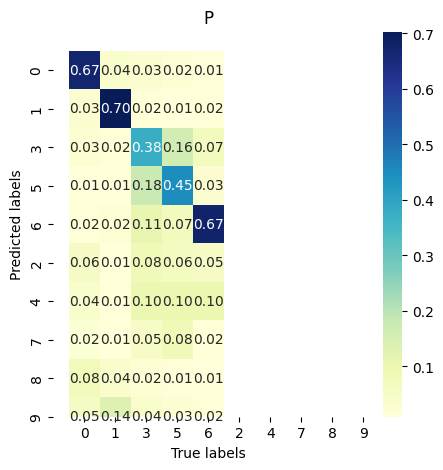

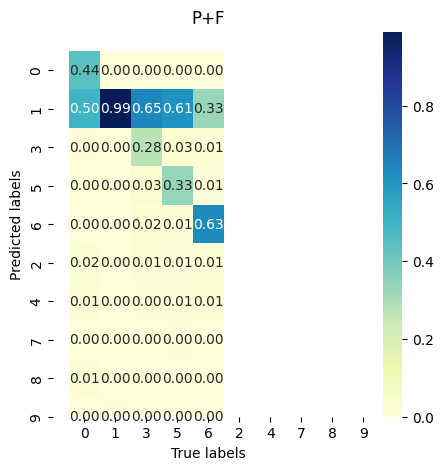

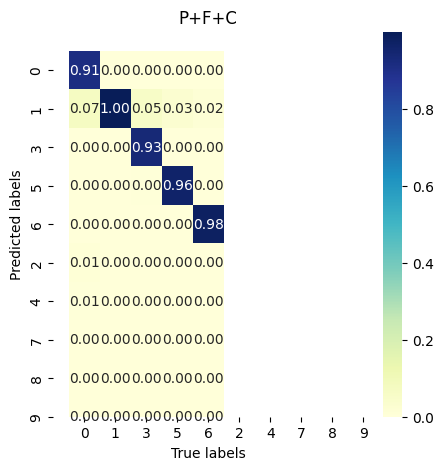

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to load data, compute confusion matrix, and return normalized confusion matrix with reordering
def load_and_compute_cm_with_reordering(predicted_path, true_path, order):
    predicted_labels = np.load(predicted_path)
    true_labels = np.load(true_path)
    cm = confusion_matrix(true_labels, predicted_labels, labels=order)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return cm_normalized

# Define the new order for labels
new_order = [0, 1, 3, 5, 6, 2, 4, 7, 8, 9]

# File paths for the three cases
paths = {
    "uram-before": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram_after-abl": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram-after": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    }
}

# Compute confusion matrices for each case with reordering
cm_before = load_and_compute_cm_with_reordering(paths["uram-before"]["prd"], paths["uram-before"]["true"], new_order)
cm_after_abl = load_and_compute_cm_with_reordering(paths["uram_after-abl"]["prd"], paths["uram_after-abl"]["true"], new_order)
cm_after = load_and_compute_cm_with_reordering(paths["uram-after"]["prd"], paths["uram-after"]["true"], new_order)

# Plot the first confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm_before.T, annot=True, fmt='.2f', cmap='YlGnBu', xticklabels=new_order, yticklabels=new_order)
plt.title('P')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.ylim(len(new_order)-0.5, -0.5)
plt.xlim(-0.5, len(new_order)-0.5)
plt.show()

# Plot the second confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm_after_abl.T, annot=True, fmt='.2f', cmap='YlGnBu', xticklabels=new_order, yticklabels=new_order)
plt.title('P+F')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.ylim(len(new_order)-0.5, -0.5)
plt.xlim(-0.5, len(new_order)-0.5)
plt.show()

# Plot the third confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm_after.T, annot=True, fmt='.2f', cmap='YlGnBu', xticklabels=new_order, yticklabels=new_order)
plt.title('P+F+C')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.ylim(len(new_order)-0.5, -0.5)
plt.xlim(-0.5, len(new_order)-0.5)
plt.show()


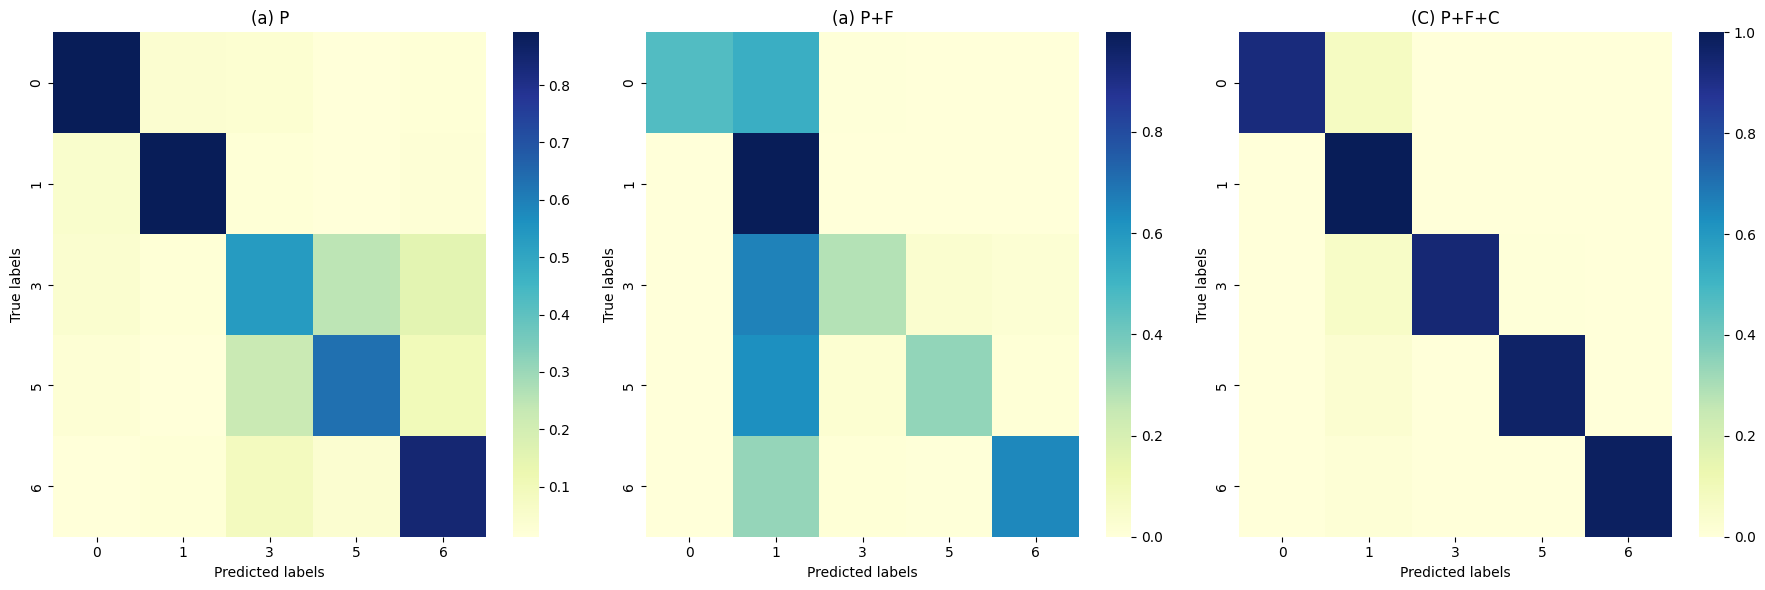

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to load data, compute confusion matrix, and return normalized confusion matrix with reordering
def load_and_compute_cm_with_reordering(predicted_path, true_path, order):
    predicted_labels = np.load(predicted_path)
    true_labels = np.load(true_path)
    cm = confusion_matrix(true_labels, predicted_labels, labels=order)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return cm_normalized

# Define the new order for labels
new_order = [0, 1, 3, 5, 6]

# File paths for the three cases
paths = {
    "uram-before": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram_after-abl": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram-after": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    }
}

# Compute confusion matrices for each case with reordering
cm_before = load_and_compute_cm_with_reordering(paths["uram-before"]["prd"], paths["uram-before"]["true"], new_order)
cm_after_abl = load_and_compute_cm_with_reordering(paths["uram_after-abl"]["prd"], paths["uram_after-abl"]["true"], new_order)
cm_after = load_and_compute_cm_with_reordering(paths["uram-after"]["prd"], paths["uram-after"]["true"], new_order)


plt.style.use("default")

# Plotting the confusion matrices side by side with reordered axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(cm_before, annot=False, cmap='YlGnBu', cbar=True, ax=axes[0], xticklabels=new_order, yticklabels=new_order)
axes[0].set_title('(a) P')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

sns.heatmap(cm_after_abl, annot=False, cmap='YlGnBu', cbar=True, ax=axes[1], xticklabels=new_order, yticklabels=new_order)
axes[1].set_title('(a) P+F')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

sns.heatmap(cm_after, annot=False, cmap='YlGnBu', cbar=True, ax=axes[2], xticklabels=new_order, yticklabels=new_order)
axes[2].set_title('(C) P+F+C')
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('True labels')

# use default style
plt.tight_layout()
plt.show()


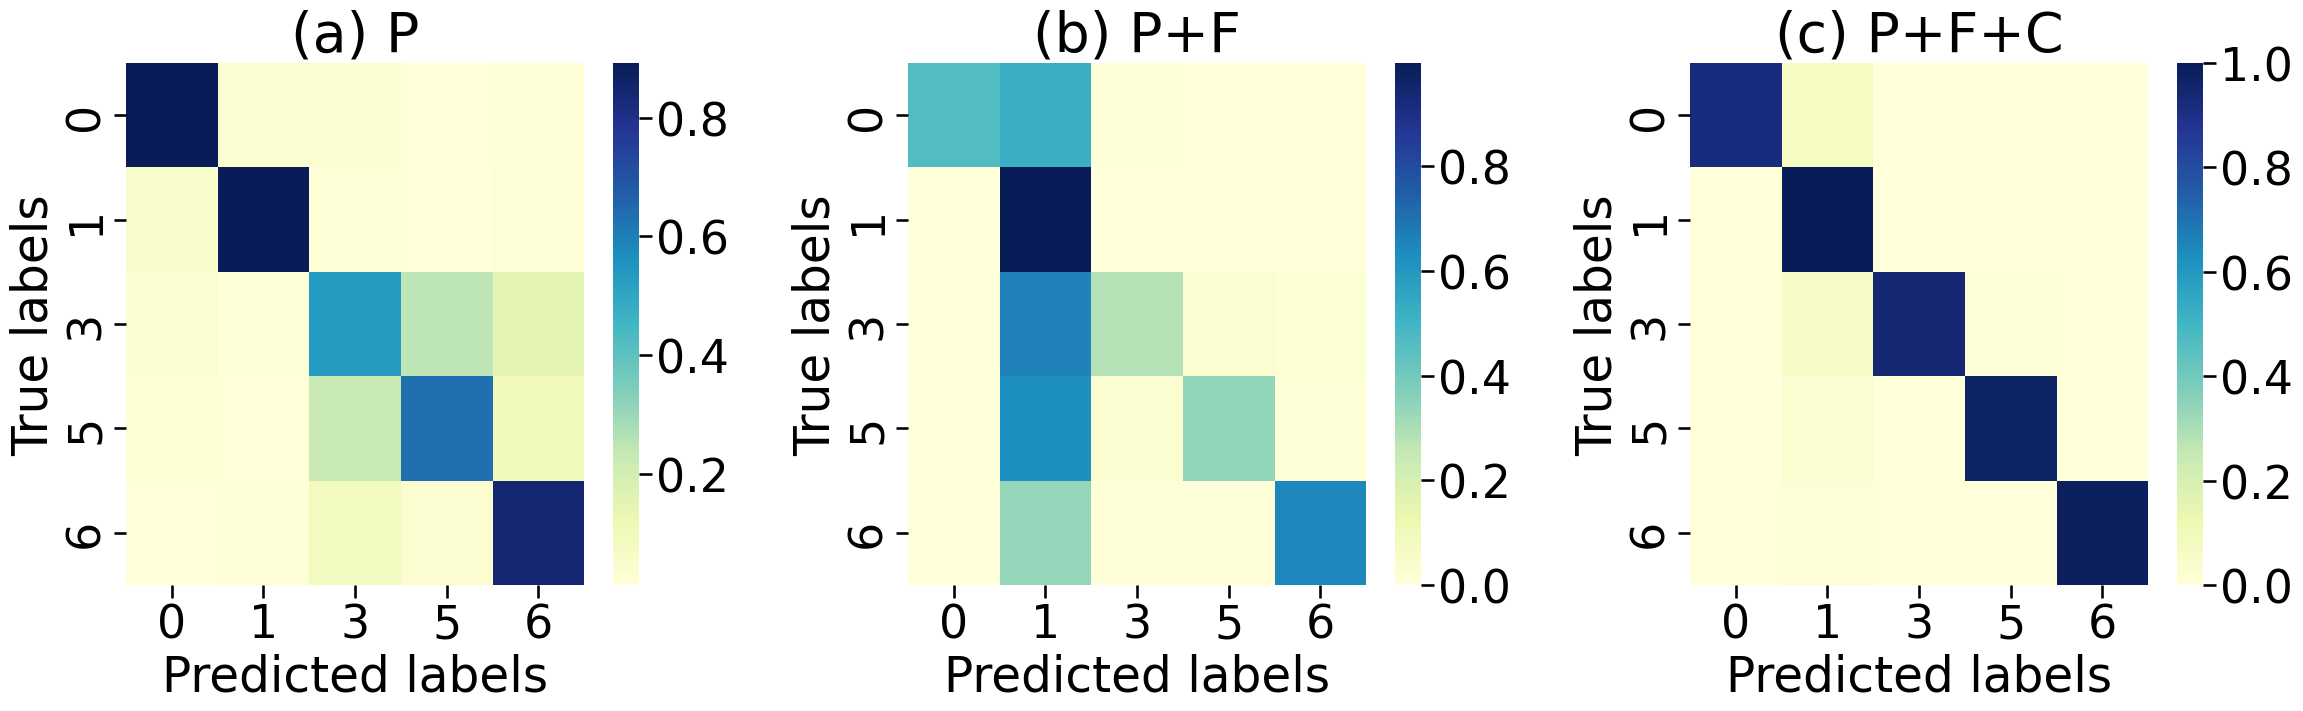

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to load data, compute confusion matrix, and return normalized confusion matrix with reordering
def load_and_compute_cm_with_reordering(predicted_path, true_path, order):
    predicted_labels = np.load(predicted_path)
    true_labels = np.load(true_path)
    cm = confusion_matrix(true_labels, predicted_labels, labels=order)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return cm_normalized

# Define the new order for labels
new_order = [0, 1, 3, 5, 6]

# File paths for the three cases
paths = {
    "uram-before": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram_after-abl": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram-after": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    }
}

# Compute confusion matrices for each case with reordering
cm_before = load_and_compute_cm_with_reordering(paths["uram-before"]["prd"], paths["uram-before"]["true"], new_order)
cm_after_abl = load_and_compute_cm_with_reordering(paths["uram_after-abl"]["prd"], paths["uram_after-abl"]["true"], new_order)
cm_after = load_and_compute_cm_with_reordering(paths["uram-after"]["prd"], paths["uram-after"]["true"], new_order)


plt.style.use("default")

# Set the font scale to ensure larger font sizes
sns.set_context("talk", font_scale=2)

# Plotting the confusion matrices side by side with reordered axes
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

sns.heatmap(cm_before, annot=False, cmap='YlGnBu', cbar=True, ax=axes[0], xticklabels=new_order, yticklabels=new_order)
axes[0].set_title('(a) P', fontsize=40)
axes[0].set_xlabel('Predicted labels', fontsize=35)
axes[0].set_ylabel('True labels', fontsize=35)

sns.heatmap(cm_after_abl, annot=False, cmap='YlGnBu', cbar=True, ax=axes[1], xticklabels=new_order, yticklabels=new_order)
axes[1].set_title('(b) P+F', fontsize=40)
axes[1].set_xlabel('Predicted labels', fontsize=35)
axes[1].set_ylabel('True labels', fontsize=35)

sns.heatmap(cm_after, annot=False, cmap='YlGnBu', cbar=True, ax=axes[2], xticklabels=new_order, yticklabels=new_order)
axes[2].set_title('(c) P+F+C', fontsize=40)
axes[2].set_xlabel('Predicted labels', fontsize=35)
axes[2].set_ylabel('True labels', fontsize=35)

plt.tight_layout()
plt.show()

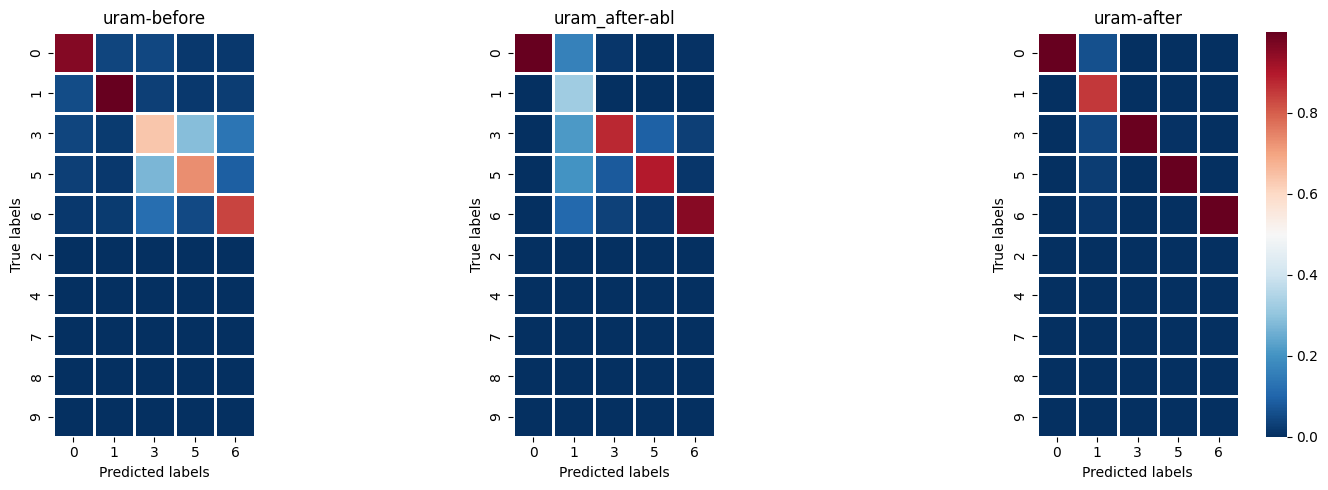

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to load data, compute confusion matrix, and return normalized confusion matrix with reordering
def load_and_compute_cm_with_reordering(predicted_path, true_path, order):
    predicted_labels = np.load(predicted_path)
    true_labels = np.load(true_path)
    cm = confusion_matrix(true_labels, predicted_labels, labels=order, normalize='pred')
    cm_normalized = cm[:, :5]
    return cm_normalized

# Define the new order for labels
new_order = [0, 1, 3, 5, 6, 2, 4, 7, 8, 9]

# File paths for the three cases
paths = {
    "uram-before": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram_after-abl": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram-after": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    }
}

# Compute confusion matrices for each case with reordering
cm_before = load_and_compute_cm_with_reordering(paths["uram-before"]["prd"], paths["uram-before"]["true"], new_order)
cm_after_abl = load_and_compute_cm_with_reordering(paths["uram_after-abl"]["prd"], paths["uram_after-abl"]["true"], new_order)
cm_after = load_and_compute_cm_with_reordering(paths["uram-after"]["prd"], paths["uram-after"]["true"], new_order)

# Plotting the confusion matrices side by side with reordered axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Set a consistent figure size

# Set the heatmap style to be similar for all three subplots
sns.heatmap(cm_before, annot=False, linewidth=1, square=True, cmap='RdBu_r', cbar=False, ax=axes[0], xticklabels=new_order[:5], yticklabels=new_order)
axes[0].set_title('uram-before')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

sns.heatmap(cm_after_abl, annot=False, linewidth=1, square=True, cmap='RdBu_r', cbar=False, ax=axes[1], xticklabels=new_order[:5], yticklabels=new_order)
axes[1].set_title('uram_after-abl')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

sns.heatmap(cm_after, annot=False, linewidth=1, square=True, cmap='RdBu_r', cbar=True, ax=axes[2], xticklabels=new_order[:5], yticklabels=new_order)
axes[2].set_title('uram-after')
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('True labels')

plt.tight_layout()
plt.show()


/tmp/ipykernel_170302/1297031596.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_170302/1297031596.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
/tmp/ipykernel_170302/1297031596.py:11: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


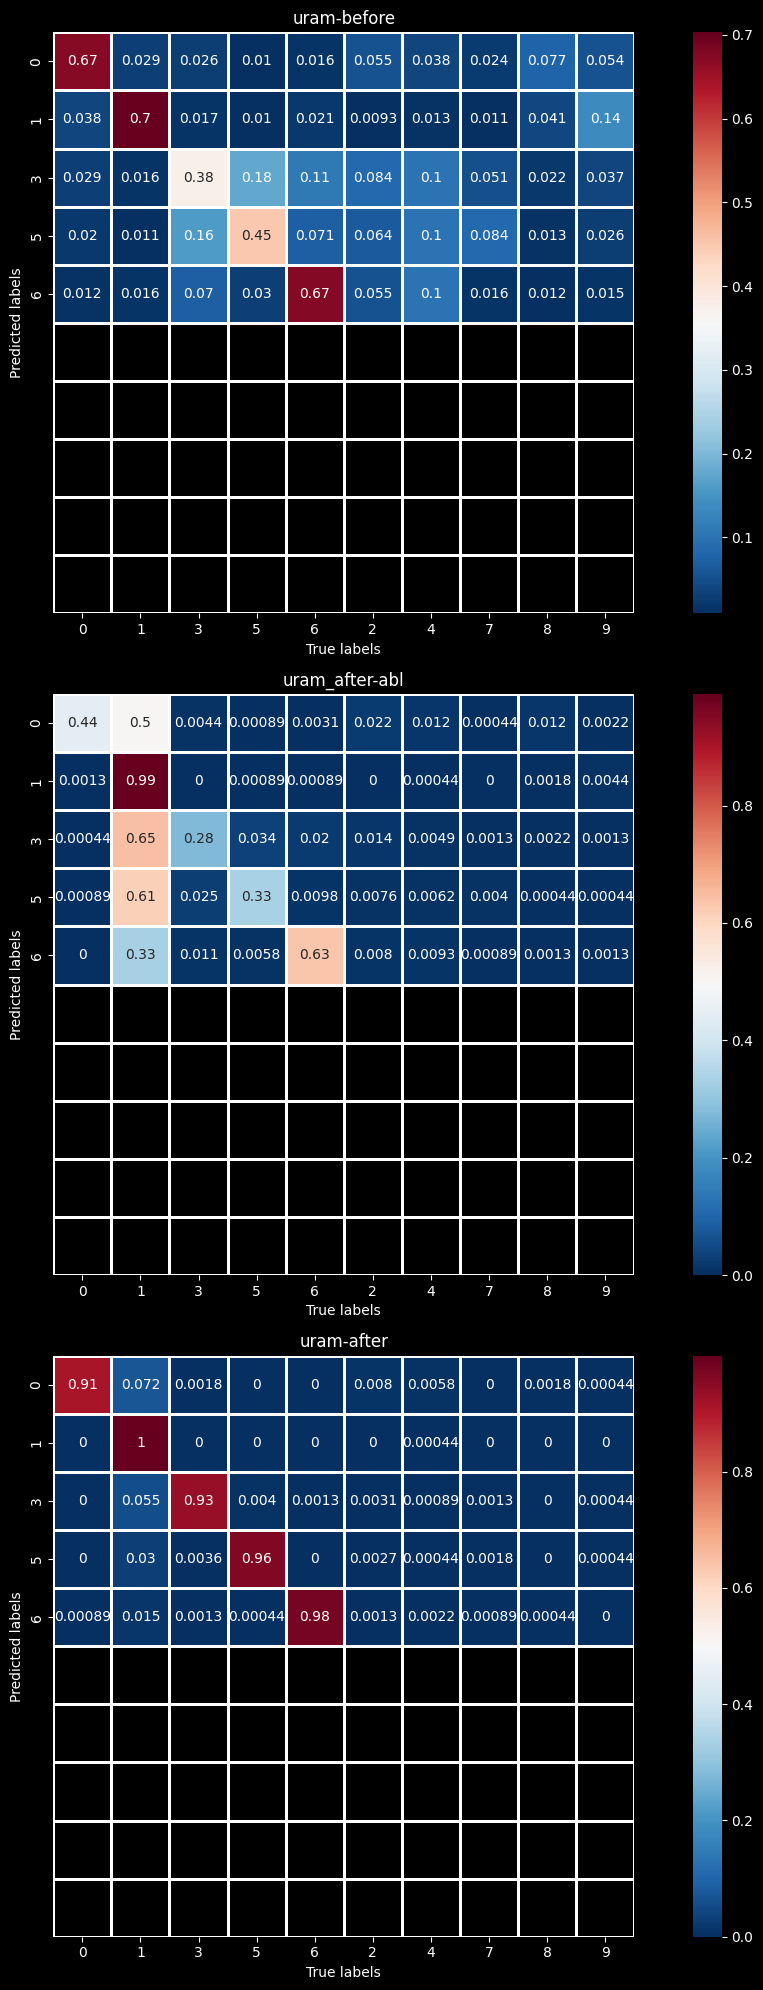

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to load data, compute confusion matrix, and return normalized confusion matrix with reordering
def load_and_compute_cm_with_reordering(predicted_path, true_path, order):
    predicted_labels = np.load(predicted_path)
    true_labels = np.load(true_path)
    cm = confusion_matrix(true_labels, predicted_labels, labels=order)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return cm_normalized

# Define the new order for labels
new_order_full = [0, 1, 3, 5, 6, 2, 4, 7, 8, 9]  # Full list including horizontal labels
new_order_vertical = [0, 1, 3, 5, 6]  # Exclude 2, 4, 7, 8, 9 from vertical labels

# File paths for the three cases
paths = {
    "uram-before": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram_after-abl": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram-after": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    }
}

# Compute confusion matrices for each case with reordering
cm_before = load_and_compute_cm_with_reordering(paths["uram-before"]["prd"], paths["uram-before"]["true"], new_order_full)
cm_after_abl = load_and_compute_cm_with_reordering(paths["uram_after-abl"]["prd"], paths["uram_after-abl"]["true"], new_order_full)
cm_after = load_and_compute_cm_with_reordering(paths["uram-after"]["prd"], paths["uram-after"]["true"], new_order_full)

# Plotting the confusion matrices side by side with reordered axes
fig, axes = plt.subplots(3, 1, figsize=(12, 20))

# Set the heatmap style to be similar to the second example, with vertical labels filtered
sns.heatmap(cm_before, annot=True, linewidth=1, square=True, cmap='RdBu_r', cbar=True, ax=axes[0], xticklabels=new_order_full, yticklabels=new_order_vertical)
# sns.heatmap(cm_before, annot=True, linewidth=1, square=True, cmap='RdBu_r', cbar=True, ax=axes[0], xticklabels=new_order_vertical, yticklabels=new_order_full)
axes[0].set_title('uram-before')
axes[0].set_xlabel('True labels')
axes[0].set_ylabel('Predicted labels')

sns.heatmap(cm_after_abl, annot=True, linewidth=1, square=True, cmap='RdBu_r', cbar=True, ax=axes[1], xticklabels=new_order_full, yticklabels=new_order_vertical)
# sns.heatmap(cm_after_abl, annot=True, linewidth=1, square=True, cmap='RdBu_r', cbar=True, ax=axes[1], xticklabels=new_order_vertical, yticklabels=new_order_full)
axes[1].set_title('uram_after-abl')
axes[1].set_xlabel('True labels')
axes[1].set_ylabel('Predicted labels')

sns.heatmap(cm_after, annot=True, linewidth=1, square=True, cmap='RdBu_r', cbar=True, ax=axes[2], xticklabels=new_order_full, yticklabels=new_order_vertical)
# sns.heatmap(cm_after, annot=True, linewidth=1, square=True, cmap='RdBu_r', cbar=True, ax=axes[2], xticklabels=new_order_vertical, yticklabels=new_order_full)
axes[2].set_title('uram-after')
axes[2].set_xlabel('True labels')
axes[2].set_ylabel('Predicted labels')

plt.tight_layout()
plt.show()


# TMP -1

In [92]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from MulticoreTSNE import MulticoreTSNE as TSNE

# CIFAR-10 Class names, with forgotten classes marked with '?' and placed first
class_names = ['airplane', 'automobile', 'cat', 'dog', 'frog', 'bird', 'deer', 'horse', 'ship', 'truck']

# 索引为 0, 1, 3, 5, 6 对应的类别是遗忘类
forgotten_indices = [0, 1, 3, 5, 6]
forgotten_classes = [class_names[i] + '  ?' for i in forgotten_indices]
remaining_indices = [i for i in range(10) if i not in forgotten_indices]
remaining_classes = [class_names[i] for i in remaining_indices]

# Combine classes, putting forgotten classes first
ordered_class_names = forgotten_classes + remaining_classes

# Paths dictionary remains the same
paths = {
    "um-before": {
        "forget":        "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/retrain/retrain_forget_embedding.npy",
        "forget_labels": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy",
        "test":          "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/retrain/retrain_test_embedding.npy",
        "test_labels":   "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/test_label.npy",
        
    },
    "uram-before": {
        "forget":  "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_embedding.npy",
        "forget_labels": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy",
        "test":    "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_test_embedding.npy",
        "test_labels":   "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/test_label.npy",
    },
    "uram-after": {
        "forget":        "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/retrain/lipnet_forget_embedding_ft.npy",
        "forget_labels": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy",
        "test":          "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/retrain/lipnet_test_embedding_ft.npy",
        "test_labels":   "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/test_label.npy",
    }
}


# Function to load data, apply PCA, and perform t-SNE
def load_and_tsne_combined(forget_path, test_path, forget_labels_path, test_labels_path, n_components=50, tsne_components=2, n_jobs=8):
    forget_embedding = np.load(forget_path)
    test_embedding = np.load(test_path)
    forget_labels = np.load(forget_labels_path)
    test_labels = np.load(test_labels_path)
    
    # Concatenate embeddings and labels
    embeddings = np.concatenate((forget_embedding, test_embedding), axis=0)
    labels = np.concatenate((forget_labels, test_labels), axis=0)
    
    # Apply PCA to reduce dimensions before t-SNE
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(embeddings)
    
    # Apply t-SNE using MulticoreTSNE for speedup
    tsne = TSNE(n_components=tsne_components, n_jobs=n_jobs, random_state=42)
    tsne_result = tsne.fit_transform(pca_result)
    
    return tsne_result, labels

# Plotting parameters
title_fontsize = 40  # Title font size
legend_fontsize = 40  # Legend font size
marker_size = 38  # Marker size for scatter plots
legend_marker_size = 8  # Marker size in the legend
red_fontsize = 50  # Red question mark font size

# Example for 'Retrain' method
method_name = "Retrain"
# paths = all_paths[method_name]

# Plotting the t-SNE results side by side without distinction between forget and test
fig, axes = plt.subplots(1, 3, figsize=(40, 15))  # Adjusted figsize for larger images
colors = plt.cm.get_cmap("tab10", 10)

# Plot um-before
tsne_um_before, labels_um_before = load_and_tsne_combined(
    paths["um-before"]["forget"], paths["um-before"]["test"],
    paths["um-before"]["forget_labels"], paths["um-before"]["test_labels"]
)
for i, idx in enumerate(forgotten_indices + remaining_indices):
    indices = np.where(labels_um_before == idx)[0]
    axes[0].scatter(tsne_um_before[indices, 0],
                    tsne_um_before[indices, 1],
                    color=colors(i), marker='o', label=ordered_class_names[i], alpha=0.6, s=marker_size)
axes[0].set_title(f'(a) t-SNE of UM Before ({method_name})', fontsize=title_fontsize)

# Plot uram-before
tsne_uram_before, labels_uram_before = load_and_tsne_combined(
    paths["uram-before"]["forget"], paths["uram-before"]["test"],
    paths["uram-before"]["forget_labels"], paths["uram-before"]["test_labels"]
)
for i, idx in enumerate(forgotten_indices + remaining_indices):
    indices = np.where(labels_uram_before == idx)[0]
    axes[1].scatter(tsne_uram_before[indices, 0],
                    tsne_uram_before[indices, 1],
                    color=colors(i), marker='o', label=ordered_class_names[i], alpha=0.6, s=marker_size)
axes[1].set_title(f'(b) t-SNE of CMIRA Before ({method_name})', fontsize=title_fontsize)

# Plot uram-after
tsne_uram_after, labels_uram_after = load_and_tsne_combined(
    paths["uram-after"]["forget"], paths["uram-after"]["test"],
    paths["uram-after"]["forget_labels"], paths["uram-after"]["test_labels"]
)
for i, idx in enumerate(forgotten_indices + remaining_indices):
    indices = np.where(labels_uram_after == idx)[0]
    axes[2].scatter(tsne_uram_after[indices, 0],
                    tsne_uram_after[indices, 1],
                    color=colors(i), marker='o', label=ordered_class_names[i], alpha=0.6, s=marker_size)
axes[2].set_title(f'(c) t-SNE of CMIRA After ({method_name})', fontsize=title_fontsize)

# Remove x and y axis numbers (ticks) from all subplots
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

# Modify the legend to place forgotten classes first with a larger red question mark
handles, labels = axes[0].get_legend_handles_labels()

# Customizing labels with a larger question mark for forgotten classes
custom_labels = []
for label in ordered_class_names:
    if '?' in label:
        custom_labels.append(f"{label[:-1]} ?")  # Making the question mark larger by adding extra spaces
    else:
        custom_labels.append(label)

# Plotting the legend
fig.legend(handles, custom_labels, loc='upper center', fontsize=legend_fontsize, markerscale=legend_marker_size + 2, ncol=10, bbox_to_anchor=(0.5, 1.15), frameon=False)

# Adjust layout to minimize side margins and fill the space
fig.subplots_adjust(left=0, right=1, top=0.75, bottom=0.05, wspace=0.05)
plt.show()


/tmp/ipykernel_170302/4147665913.py:77: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", 10)


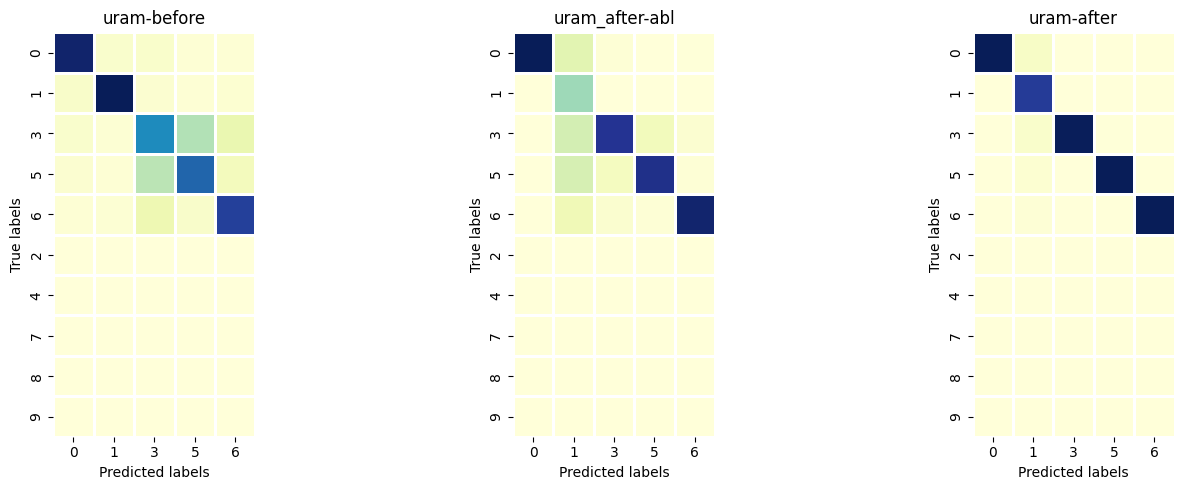

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to load data, compute confusion matrix, and return normalized confusion matrix with reordering
def load_and_compute_cm_with_reordering(predicted_path, true_path, order):
    predicted_labels = np.load(predicted_path)
    true_labels = np.load(true_path)
    cm = confusion_matrix(true_labels, predicted_labels, labels=order, normalize='pred')
    cm_normalized = cm[:, :5]
    # cm_normalized = cm
    return cm_normalized

# Define the new order for labels
new_order = [0, 1, 3, 5, 6, 2, 4, 7, 8, 9]

# File paths for the three cases
paths = {
    "uram-before": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_predicts.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram_after-abl": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-step05-ablation-2-0812-1015/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    },
    "uram-after": {
        "prd": "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/FF/lipnet_forget_predicts_ft.npy",
        "true": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy"
    }
}

# Compute confusion matrices for each case with reordering
cm_before = load_and_compute_cm_with_reordering(paths["uram-before"]["prd"], paths["uram-before"]["true"], new_order)
cm_after_abl = load_and_compute_cm_with_reordering(paths["uram_after-abl"]["prd"], paths["uram_after-abl"]["true"], new_order)
cm_after = load_and_compute_cm_with_reordering(paths["uram-after"]["prd"], paths["uram-after"]["true"], new_order)

# Plotting the confusion matrices side by side with reordered axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Set a consistent figure size

# Set the heatmap style to be similar for all three subplots
sns.heatmap(cm_before, annot=False, linewidth=1, square=True, cmap='YlGnBu', cbar=False, ax=axes[0], xticklabels=new_order[:5], yticklabels=new_order)
axes[0].set_title('uram-before')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

sns.heatmap(cm_after_abl, annot=False, linewidth=1, square=True, cmap='YlGnBu', cbar=False, ax=axes[1], xticklabels=new_order[:5], yticklabels=new_order)
axes[1].set_title('uram_after-abl')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

sns.heatmap(cm_after, annot=False, linewidth=1, square=True, cmap='YlGnBu', cbar=False, ax=axes[2], xticklabels=new_order[:5], yticklabels=new_order)
axes[2].set_title('uram-after')
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('True labels')

plt.tight_layout()
plt.show()

# TMP - 2

/tmp/ipykernel_170302/1706004389.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", 10)


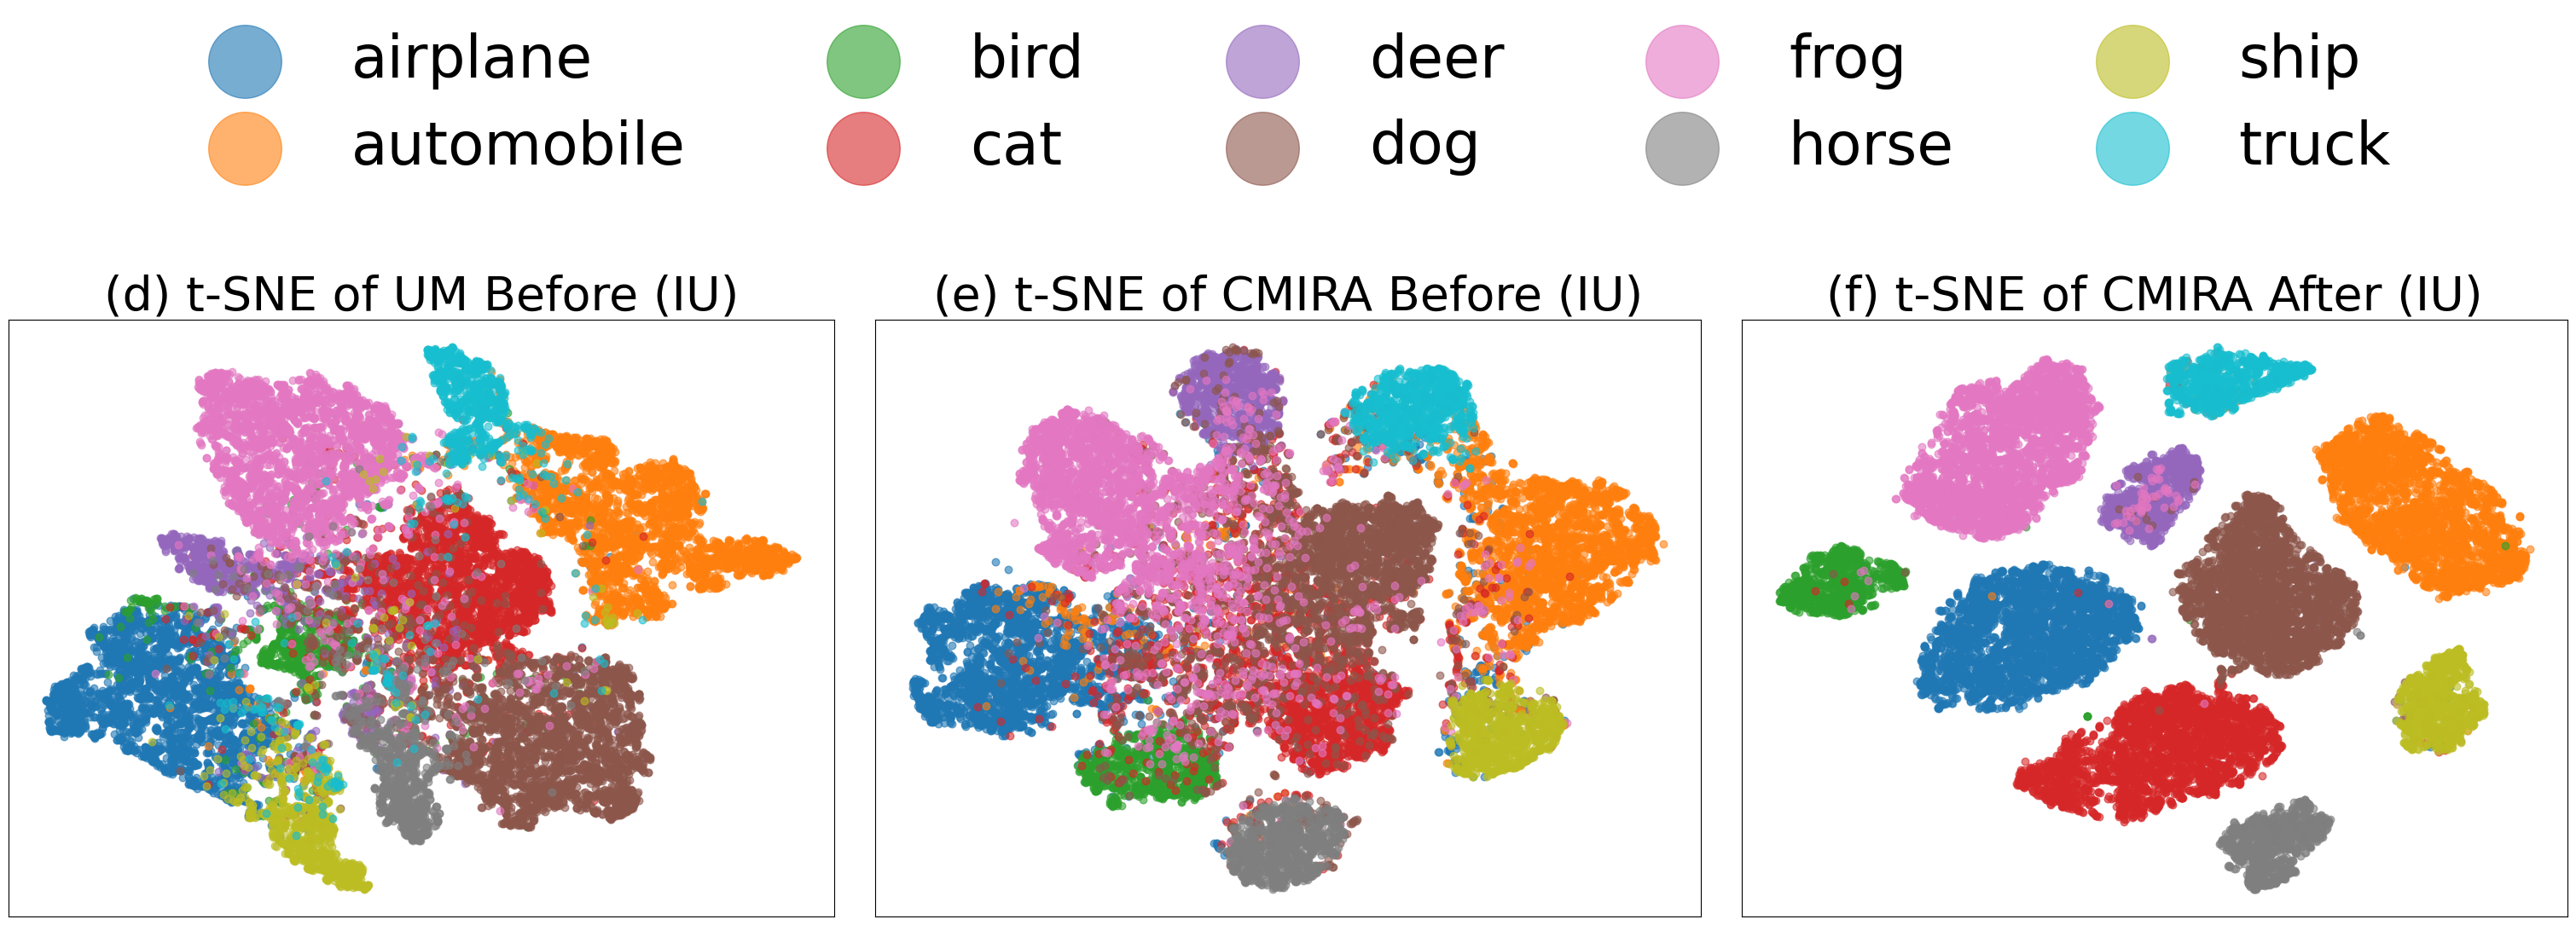

In [85]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from MulticoreTSNE import MulticoreTSNE as TSNE

# CIFAR-10 Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
            'dog', 'frog', 'horse', 'ship', 'truck']




paths = {
    "um-before": {
        "forget":        "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/IU/wfisher_forget_embedding.npy",
        "forget_labels": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy",
        "test":          "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/IU/wfisher_test_embedding.npy",
        "test_labels":   "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/test_label.npy",
        
    },
    "uram-before": {
        "forget":  "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_forget_embedding.npy",
        "forget_labels": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy",
        "test":    "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/lipnet/resnet18/cifar10/lipnet_test_embedding.npy",
        "test_labels":   "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/test_label.npy",
    },
    "uram-after": {
        "forget":        "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/IU/lipnet_forget_embedding_ft.npy",
        "forget_labels": "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/forget_label.npy",
        "test":          "/nvme/szh/data/3ai/lips/outputs-after-ft04-pm-1623/resnet18_cifar10/IU/lipnet_test_embedding_ft.npy",
        "test_labels":   "/nvme/szh/data/3ai/lips/saved_data_embedding/cifar10/test_label.npy",
    }
}



# Function to load data, apply PCA, and perform t-SNE
def load_and_tsne_combined(forget_path, test_path, forget_labels_path, test_labels_path, n_components=50, tsne_components=2, n_jobs=8):
    forget_embedding = np.load(forget_path)
    test_embedding = np.load(test_path)
    forget_labels = np.load(forget_labels_path)
    test_labels = np.load(test_labels_path)
    
    # Concatenate embeddings and labels
    embeddings = np.concatenate((forget_embedding, test_embedding), axis=0)
    labels = np.concatenate((forget_labels, test_labels), axis=0)
    
    # Apply PCA to reduce dimensions before t-SNE
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(embeddings)
    
    # Apply t-SNE using MulticoreTSNE for speedup
    tsne = TSNE(n_components=tsne_components, n_jobs=n_jobs, random_state=42)
    tsne_result = tsne.fit_transform(pca_result)
    
    return tsne_result, labels

# Plotting parameters
title_fontsize = 40  # Title font size
legend_fontsize = 40  # Legend font size
marker_size = 38  # Marker size for scatter plots
legend_marker_size = 8  # Marker size in the legend

# Example for 'Retrain' method
method_name = "IU"
# paths = all_paths[method_name]

# Plotting the t-SNE results side by side without distinction between forget and test
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
colors = plt.cm.get_cmap("tab10", 10)

# Plot um-before
tsne_um_before, labels_um_before = load_and_tsne_combined(
    paths["um-before"]["forget"], paths["um-before"]["test"],
    paths["um-before"]["forget_labels"], paths["um-before"]["test_labels"]
)
for i in range(10):
    indices = np.where(labels_um_before == i)[0]
    axes[0].scatter(tsne_um_before[indices, 0],
                    tsne_um_before[indices, 1],
                    color=colors(i), marker='o', label=class_names[i], alpha=0.6, s=marker_size)
axes[0].set_title(f'(d) t-SNE of UM Before ({method_name})', fontsize=title_fontsize)

# Plot uram-before
tsne_uram_before, labels_uram_before = load_and_tsne_combined(
    paths["uram-before"]["forget"], paths["uram-before"]["test"],
    paths["uram-before"]["forget_labels"], paths["uram-before"]["test_labels"]
)
for i in range(10):
    indices = np.where(labels_uram_before == i)[0]
    axes[1].scatter(tsne_uram_before[indices, 0],
                    tsne_uram_before[indices, 1],
                    color=colors(i), marker='o', label=class_names[i], alpha=0.6, s=marker_size)
axes[1].set_title(f'(e) t-SNE of CMIRA Before ({method_name})', fontsize=title_fontsize)

# Plot uram-after
tsne_uram_after, labels_uram_after = load_and_tsne_combined(
    paths["uram-after"]["forget"], paths["uram-after"]["test"],
    paths["uram-after"]["forget_labels"], paths["uram-after"]["test_labels"]
)
for i in range(10):
    indices = np.where(labels_uram_after == i)[0]
    axes[2].scatter(tsne_uram_after[indices, 0],
                    tsne_uram_after[indices, 1],
                    color=colors(i), marker='o', label=class_names[i], alpha=0.6, s=marker_size)
axes[2].set_title(f'(f) t-SNE of CMIRA After ({method_name})', fontsize=title_fontsize)

# Remove x and y axis numbers (ticks) from all subplots
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

# Add a single flat legend above the plot with larger markers and font size
handles, labels = axes[0].get_legend_handles_labels()

# fig.legend(handles, labels, loc='upper center', fontsize=legend_fontsize, markerscale=legend_marker_size, ncol=5, bbox_to_anchor=(0.5, 1.20))

# Modify the legend properties for wider and larger display
fig.legend(handles, labels, loc='upper center', fontsize=legend_fontsize + 10, markerscale=legend_marker_size + 2, ncol=5, bbox_to_anchor=(0.5, 1.15), frameon=False)

# Adjust layout to minimize side margins and fill the space
fig.subplots_adjust(left=0, right=1, top=0.80, bottom=0.05, wspace=0.05)

# Adjust layout to minimize side margins and fill the space
fig.subplots_adjust(left=0, right=1, top=0.75, bottom=0.05, wspace=0.05)
plt.show()
